In [1]:
!nvidia-smi

Thu May 26 12:04:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000004:04:00.0 Off |                    0 |
| N/A   35C    P0    37W / 300W |   2050MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import logging
import logging
import sys

loggers = {}
def get_logger(name, level=logging.INFO):
    global loggers
    if loggers.get(name) is not None:
        return loggers[name]
    else:
        logger = logging.getLogger(name)
        logger.setLevel(level)
        # Logging to console
        stream_handler = logging.StreamHandler(sys.stdout)
        formatter = logging.Formatter(
            '%(asctime)s [%(threadName)s] %(levelname)s %(name)s - %(message)s')
        stream_handler.setFormatter(formatter)
        logger.addHandler(stream_handler)

        loggers[name] = logger

        return logger

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 3-layer neural network
class Net(torch.nn.Module): 
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()  

        self.hidden = torch.nn.Linear(n_features, n_hidden)  # hidden layers
        self.predict = torch.nn.Linear(n_hidden, n_output)  # output layers

    def forward(self, x):  # forwrd
        a = torch.relu(self.hidden(x))
        b = self.predict(a)
        return b

In [4]:
model = Net(1,10,1)
logger = get_logger('toyplay')
# use DataParallel if more than 1 GPU available
device = 'gpu'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
device.type == 'cuda'
if torch.cuda.device_count() > 1 and not device.type == 'cpu':
    model = nn.DataParallel(model)
    logger.info(f'Using {torch.cuda.device_count()} GPUs for training')

# put the model on GPUs
model = model.to(device)

In [5]:
torch.cuda.is_available()

True

In [6]:
device

device(type='cuda')

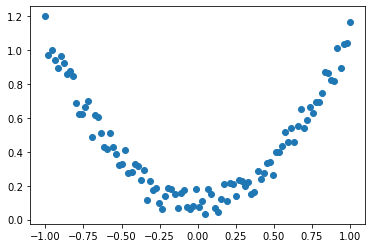

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


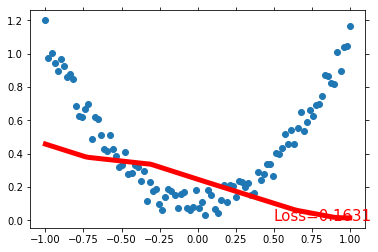

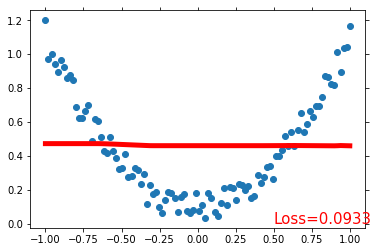

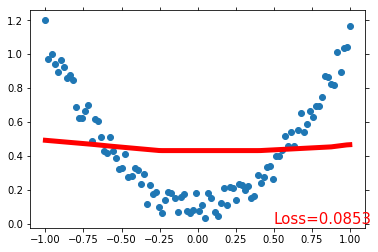

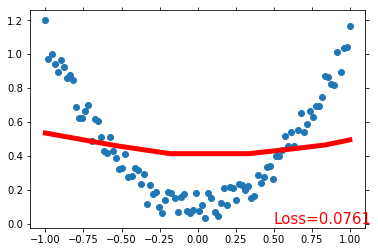

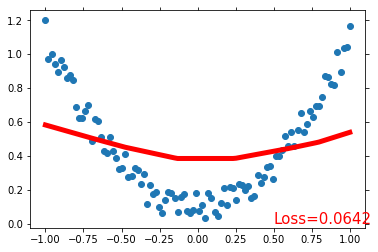

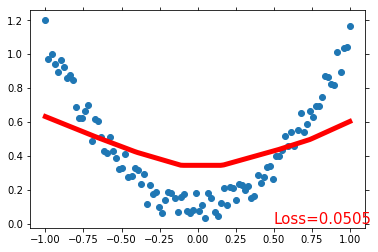

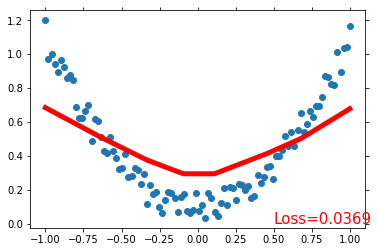

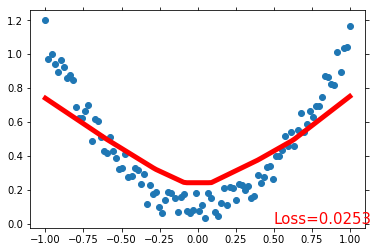

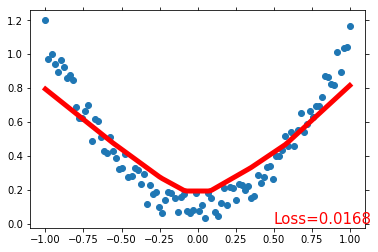

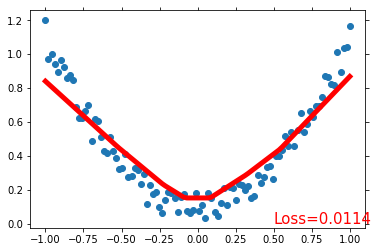

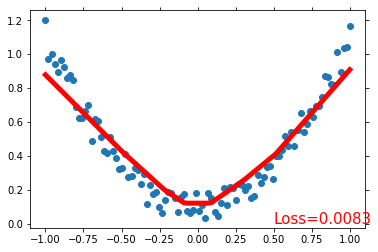

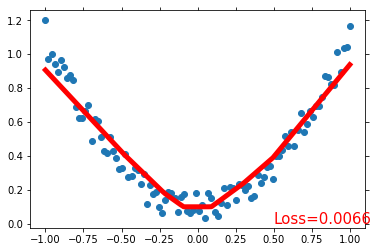

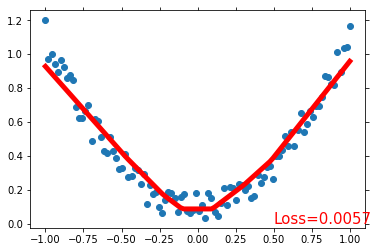

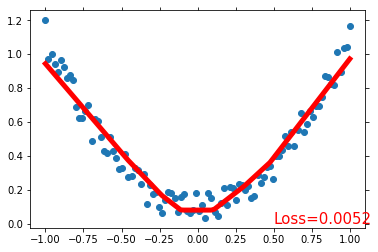

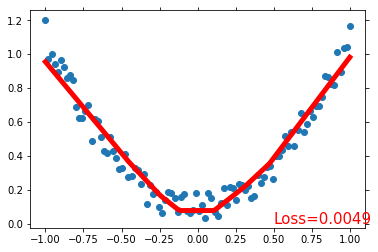

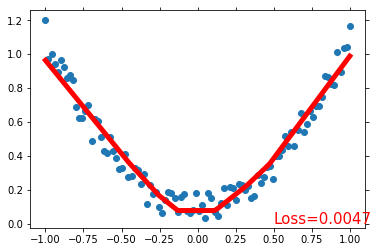

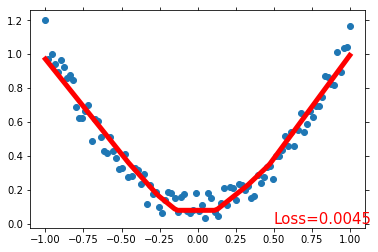

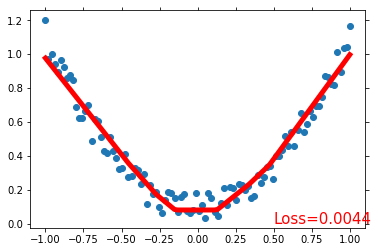

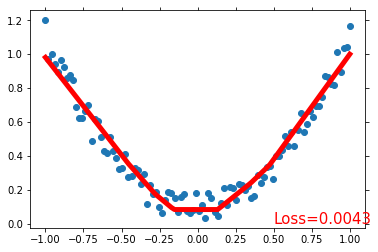

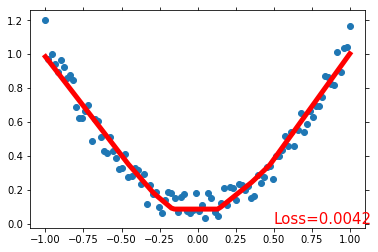

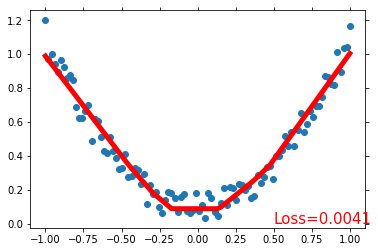

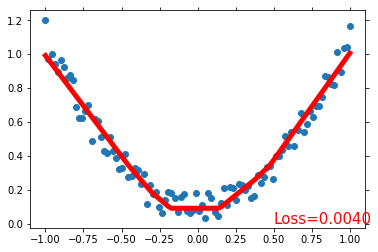

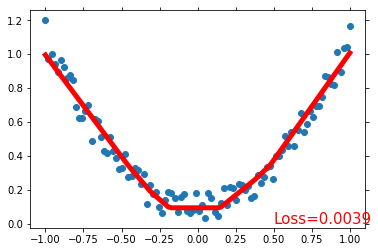

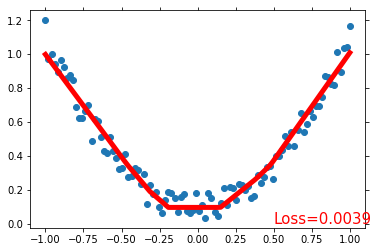

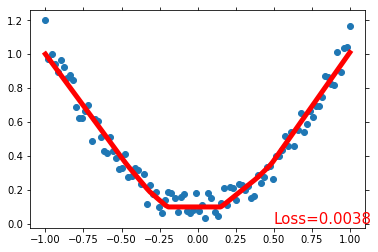

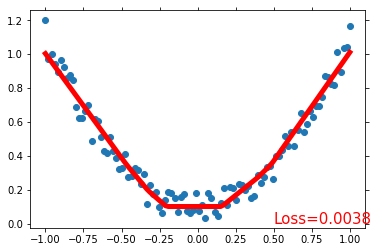

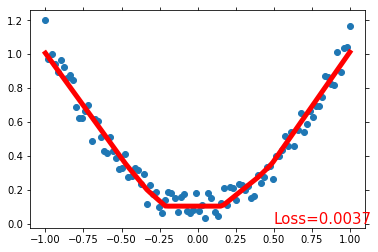

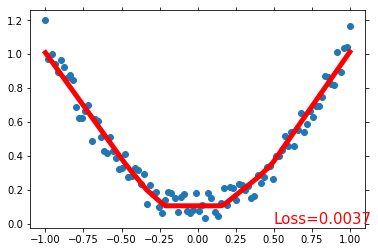

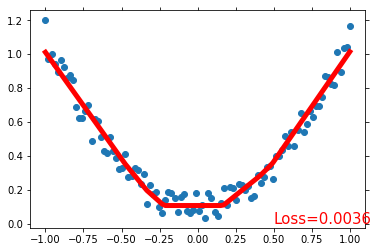

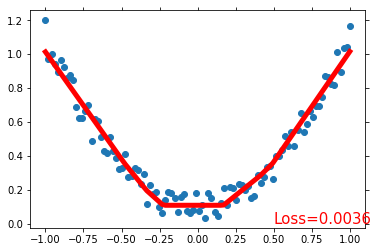

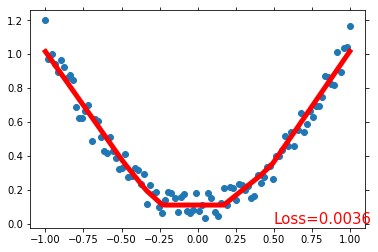

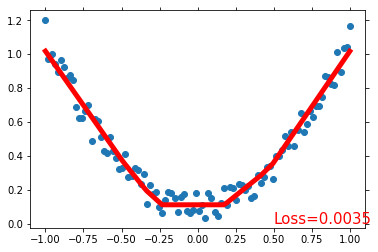

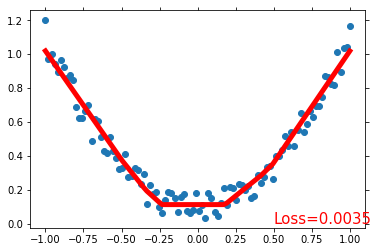

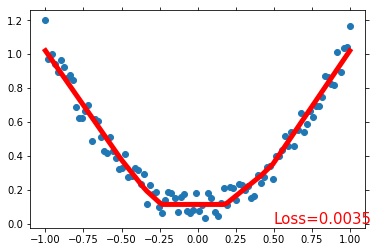

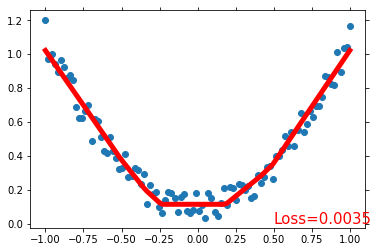

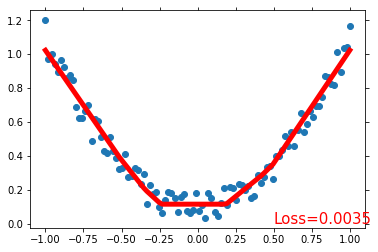

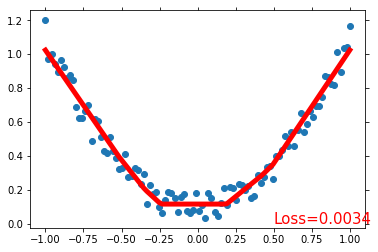

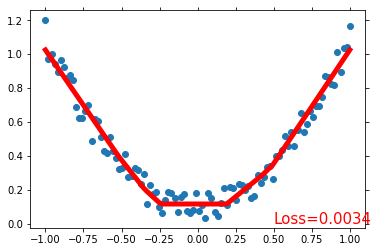

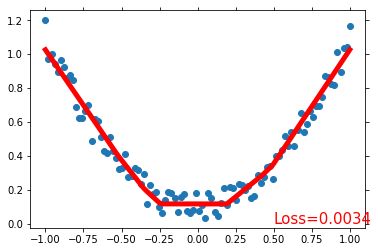

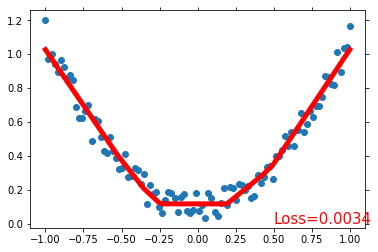

In [7]:

if __name__ == '__main__':

    # generate samples
    x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
    y = x.pow(2) + 0.2 * torch.rand(x.size())

    # plot sample plot
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.show()

    net = Net(1,10,1)
    print(net)

    plt.ion()
    plt.show()

    # optimizor using SGD
    optimizer = torch.optim.SGD(net.parameters(), lr=0.5) # learning rate

    # loss function: MSE
    loss_function = torch.nn.MSELoss()

    for t in range(200): # iterations
        prediction = net(x)  # input: x, output: prediction

        loss = loss_function(prediction, y)  # calculate the error between predicted and truth

        optimizer.zero_grad()  # 
        loss.backward()        # back probagation
        optimizer.step()       # 

        if t % 5 == 0:         # plot every 5 iterations
            plt.cla()
            plt.scatter(x.data.numpy(), y.data.numpy())
            plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
            plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(),
                     fontdict={'size': 15, 'color': 'red'})
            plt.pause(0.1)